In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("C:/Users/OFFICE/Downloads/Fortune 500 Companies/Fortune 500 Companies.csv")
dataset

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
0,General Motors Corporation,1,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,168828.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ford Motor Company,2,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,137137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Exxon Corporation,3,1996,Petroleum Refining,NaN,TX,NaN,NaN,110009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Wal-Mart Stores, Inc.",4,1996,General Merchandisers,NaN,AR,NaN,NaN,93627.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AT&T Corp.,5,1996,Telecommunications,NaN,NY,NaN,NaN,79609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13935,KKR,496,2023,Securities,Financials,NY,New York,45225.0,7273.0,841.0,277077.0,4150.0,no,no,no,no
13936,Equinix,497,2023,Real Estate,Financials,CA,Redwood City,66873.0,7263.0,704.0,30311.0,12097.0,no,no,no,no
13937,Sonoco Products,498,2023,"Packaging, Containers",Materials,SC,Hartsville,5975.0,7251.0,466.0,7053.0,22000.0,no,no,yes,no
13938,ServiceNow,499,2023,Computer Software,Technology,CA,Santa Clara,94338.0,7245.0,325.0,13299.0,20433.0,no,no,yes,no


## Data Cleaning

In [3]:
dataset.dropna(inplace = True)

In [4]:
dataset.head()

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
9940,Walmart,1,2016,General Merchandisers,Retailing,AR,Bentonville,215356.0,482130.0,14694.0,199581.0,2300000.0,no,no,no,yes
9941,Exxon Mobil,2,2016,Petroleum Refining,Energy,TX,Irving,347129.0,246204.0,16150.0,336758.0,75600.0,no,no,no,yes
9942,Apple,3,2016,"Computers, Office Equipment",Technology,CA,Cupertino,604304.0,233715.0,53394.0,290479.0,110000.0,no,no,no,yes
9943,Berkshire Hathaway,4,2016,Insurance: Property and Casualty (Stock),Financials,NE,Omaha,350279.0,210821.0,24083.0,552257.0,331000.0,no,no,no,yes
9944,McKesson,5,2016,Wholesalers: Health Care,Health Care,CA,San Francisco,35945.0,181241.0,1476.0,53870.0,70400.0,no,no,no,yes


In [5]:
dataset.tail()

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
13935,KKR,496,2023,Securities,Financials,NY,New York,45225.0,7273.0,841.0,277077.0,4150.0,no,no,no,no
13936,Equinix,497,2023,Real Estate,Financials,CA,Redwood City,66873.0,7263.0,704.0,30311.0,12097.0,no,no,no,no
13937,Sonoco Products,498,2023,"Packaging, Containers",Materials,SC,Hartsville,5975.0,7251.0,466.0,7053.0,22000.0,no,no,yes,no
13938,ServiceNow,499,2023,Computer Software,Technology,CA,Santa Clara,94338.0,7245.0,325.0,13299.0,20433.0,no,no,yes,no
13939,Robert Half International,500,2023,Temporary Help,Business Services,CA,Menlo Park,8677.0,7238.0,658.0,2965.0,16300.0,no,no,no,no


In [6]:
dataset.duplicated().sum()

0

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3778 entries, 9940 to 13939
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     3778 non-null   object 
 1   rank                     3778 non-null   int64  
 2   year                     3778 non-null   int64  
 3   industry                 3778 non-null   object 
 4   sector                   3778 non-null   object 
 5   headquarters_state       3778 non-null   object 
 6   headquarters_city        3778 non-null   object 
 7   market_value_mil         3778 non-null   float64
 8   revenue_mil              3778 non-null   float64
 9   profit_mil               3778 non-null   float64
 10  asset_mil                3778 non-null   float64
 11  employees                3778 non-null   float64
 12  founder_is_ceo           3778 non-null   object 
 13  female_ceo               3778 non-null   object 
 14  newcomer_to_fortune_

In [8]:
dataset.name = dataset.name.astype('string')
dataset.sector = dataset.sector.astype('string')
dataset.headquarters_state = dataset.headquarters_state.astype('string')
dataset.headquarters_city = dataset.headquarters_city.astype('string')
dataset.employees = dataset.employees.astype('int64')
dataset.founder_is_ceo = dataset.founder_is_ceo.astype('string')
dataset.female_ceo = dataset.female_ceo.astype('string')
dataset.newcomer_to_fortune_500 = dataset.newcomer_to_fortune_500.astype('string')
dataset.global_500 = dataset.global_500.astype('string')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3778 entries, 9940 to 13939
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     3778 non-null   string 
 1   rank                     3778 non-null   int64  
 2   year                     3778 non-null   int64  
 3   industry                 3778 non-null   object 
 4   sector                   3778 non-null   string 
 5   headquarters_state       3778 non-null   string 
 6   headquarters_city        3778 non-null   string 
 7   market_value_mil         3778 non-null   float64
 8   revenue_mil              3778 non-null   float64
 9   profit_mil               3778 non-null   float64
 10  asset_mil                3778 non-null   float64
 11  employees                3778 non-null   int64  
 12  founder_is_ceo           3778 non-null   string 
 13  female_ceo               3778 non-null   string 
 14  newcomer_to_fortune_

In [10]:
dataset.head(10)

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
9940,Walmart,1,2016,General Merchandisers,Retailing,AR,Bentonville,215356.0,482130.0,14694.0,199581.0,2300000,no,no,no,yes
9941,Exxon Mobil,2,2016,Petroleum Refining,Energy,TX,Irving,347129.0,246204.0,16150.0,336758.0,75600,no,no,no,yes
9942,Apple,3,2016,"Computers, Office Equipment",Technology,CA,Cupertino,604304.0,233715.0,53394.0,290479.0,110000,no,no,no,yes
9943,Berkshire Hathaway,4,2016,Insurance: Property and Casualty (Stock),Financials,NE,Omaha,350279.0,210821.0,24083.0,552257.0,331000,no,no,no,yes
9944,McKesson,5,2016,Wholesalers: Health Care,Health Care,CA,San Francisco,35945.0,181241.0,1476.0,53870.0,70400,no,no,no,yes
9945,UnitedHealth Group,6,2016,Health Care: Insurance and Managed Care,Health Care,MN,Minnetonka,122542.0,157107.0,5813.0,111383.0,200000,no,no,no,yes
9946,CVS Health,7,2016,Food & Drug Stores,Food & Drug Stores,RI,Woonsocket,113947.0,153290.0,5237.0,93657.0,199000,no,no,no,yes
9947,General Motors,8,2016,Motor Vehicles & Parts,Motor Vehicles & Parts,MI,Detroit,48543.0,152356.0,9687.0,194520.0,215000,no,yes,no,yes
9948,Ford Motor,9,2016,Motor Vehicles & Parts,Motor Vehicles & Parts,MI,Dearborn,53758.0,149558.0,7373.0,224925.0,199000,no,no,no,yes
9949,AT&T,10,2016,Telecommunications,Telecommunications,TX,Dallas,240943.0,146801.0,13345.0,402672.0,281450,no,no,no,yes


## Data Analysis

In [11]:
company_profit = dataset[['name', 'profit_mil']].groupby(['profit_mil'], as_index=False)

In [12]:
company_employees = dataset[['name', 'employees']].groupby(['employees'])

In [13]:
company_sector = dataset[['name', 'sector']].groupby(['sector'], as_index=False)

In [14]:
company_sector.get_group('Motor Vehicles & Parts')

,name,sector
9947,General Motors,Motor Vehicles & Parts
9948,Ford Motor,Motor Vehicles & Parts
10009,Johnson Controls,Motor Vehicles & Parts
10086,Paccar,Motor Vehicles & Parts
10093,Lear,Motor Vehicles & Parts
...,...,...
13630,Goodyear Tire & Rubber,Motor Vehicles & Parts
13693,Thor Industries,Motor Vehicles & Parts
13701,BorgWarner,Motor Vehicles & Parts
13826,Dana,Motor Vehicles & Parts


In [15]:
company_employees.get_group(7000)

,name,employees
10191,Voya Financial,7000
10345,Discovery Communications,7000
10459,Fannie Mae,7000
10851,Discovery Communications,7000
10905,Patterson,7000
10921,Chemours,7000
11044,Enterprise Products Partners,7000
11348,Discovery,7000
11390,Chemours,7000
11528,Enterprise Products Partners,7000


In [16]:
company_profit.get_group(1400.0)

,name,profit_mil
10574,Abbott Laboratories,1400.0
12190,DISH Network,1400.0


## Total profit by company

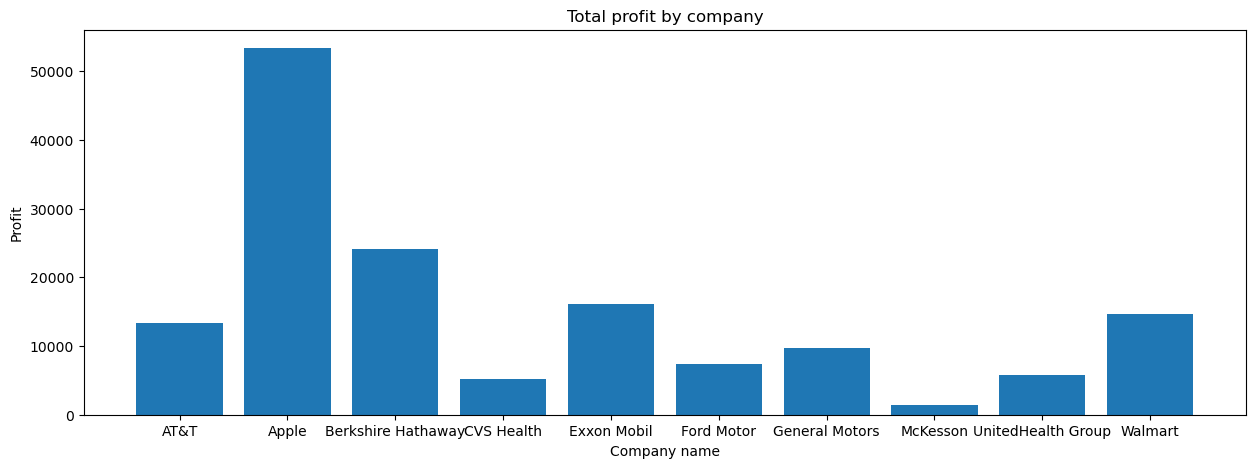

In [17]:
x = dataset[:10].groupby(['name']).sum()['profit_mil'].index
y = dataset[:10].groupby(['name']).sum()['profit_mil'].values

plt.figure(figsize=(15,5))

plt.bar(x, y)

plt.xlabel('Company name')
plt.ylabel('Profit')
plt.title('Total profit by company')

plt.show()

## Total employees by company

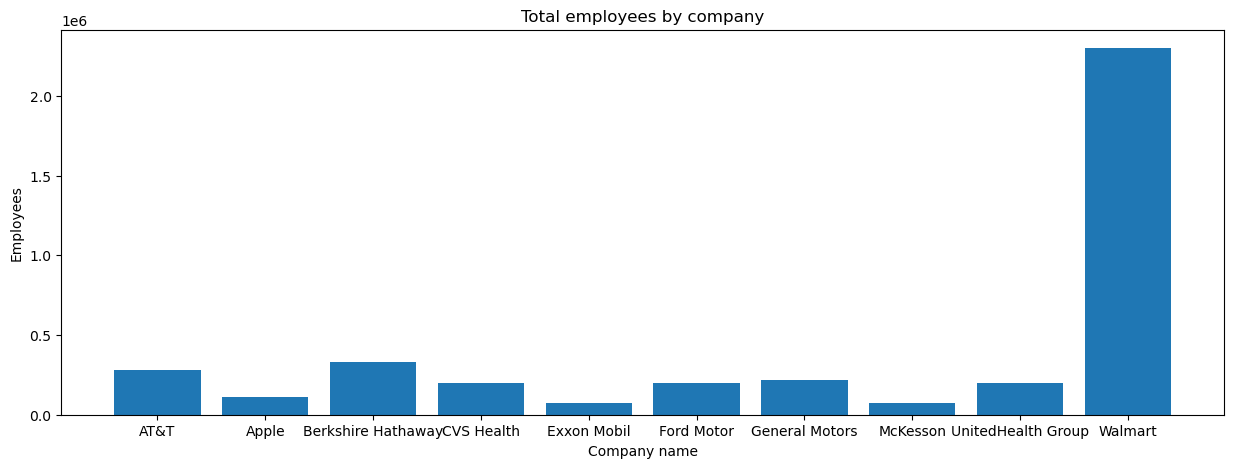

In [18]:
x = dataset[:10].groupby(['name']).sum()['employees'].index
y = dataset[:10].groupby(['name']).sum()['employees'].values

plt.figure(figsize=(15, 5))

plt.bar(x, y)

plt.xlabel('Company name')
plt.ylabel('Employees')
plt.title('Total employees by company')

plt.show()

## Total revenue by company

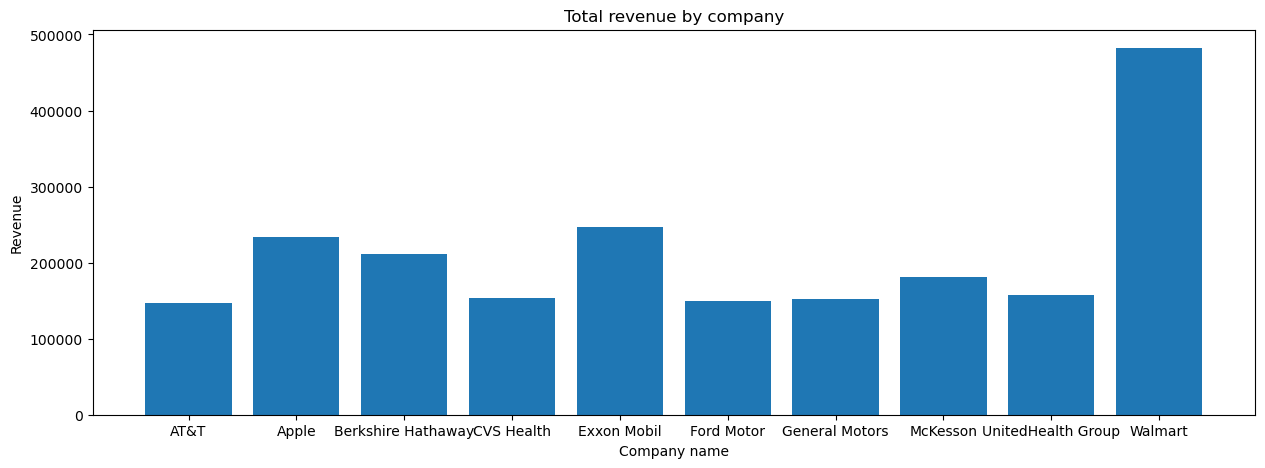

In [19]:
x = dataset[:10].groupby(['name']).sum()['revenue_mil'].index
y = dataset[:10].groupby(['name']).sum()['revenue_mil'].values

plt.figure(figsize=(15, 5))

plt.bar(x, y)

plt.xlabel('Company name')
plt.ylabel('Revenue')
plt.title('Total revenue by company')

plt.show()

## Total companies by sector

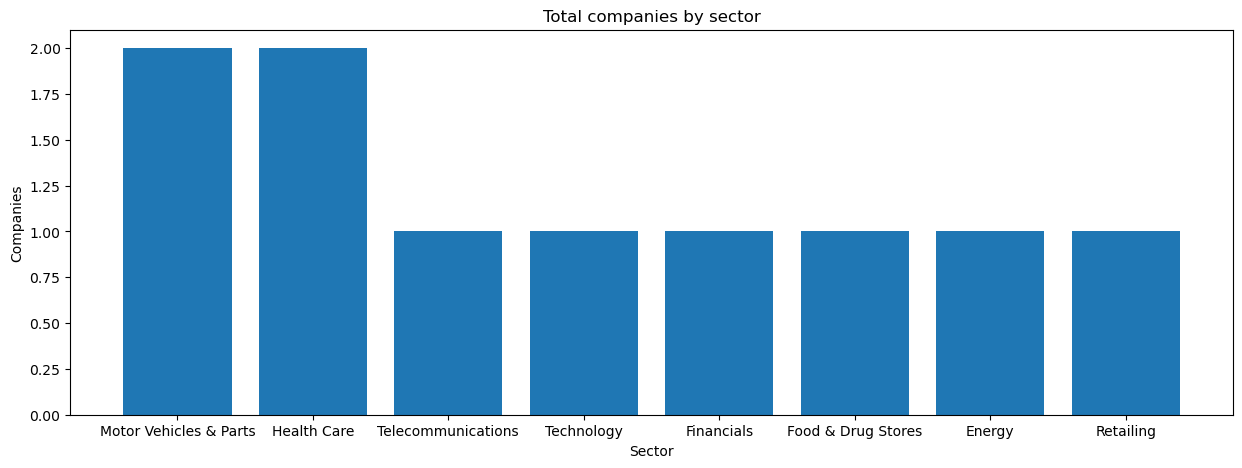

In [20]:
x = dataset[:10].groupby(['name'])['sector'].first().value_counts().index
y = dataset[:10].groupby(['name'])['sector'].first().value_counts().values

plt.figure(figsize=(15, 5))

plt.bar(x, y)

plt.xlabel('Sector')
plt.ylabel('Companies')
plt.title('Total companies by sector')

plt.show()

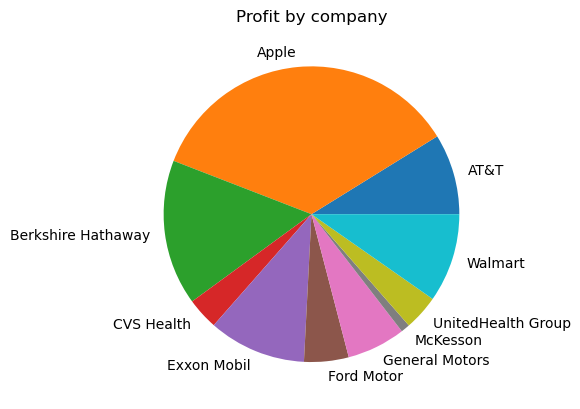

In [21]:
x = dataset[:10].groupby(['name']).sum()['profit_mil'].index
y = dataset[:10].groupby(['name']).sum()['profit_mil'].values

plt.pie(y, labels = x)
plt.title('Profit by company')

plt.show()

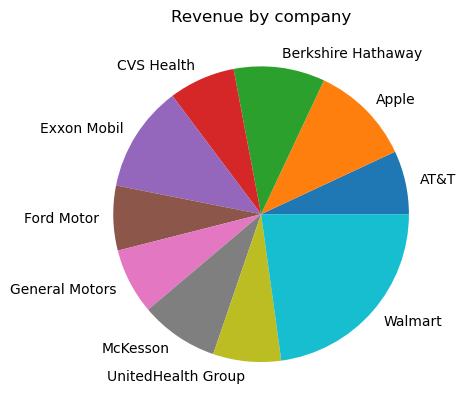

In [22]:
x = dataset[:10].groupby(['name']).sum()['revenue_mil'].index
y = dataset[:10].groupby(['name']).sum()['revenue_mil'].values

plt.pie(y, labels = x)
plt.title('Revenue by company')

plt.show()

## Model Building

In [23]:
model_data = dataset[['year', 'employees', 'revenue_mil', 'profit_mil']]

In [24]:
X = model_data.iloc[:, :-1]
Y = model_data.iloc[:, -1]

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [26]:
x_mean = x_train.mean(axis=0)
x_train -= x_mean

X_std = X.std(axis=0)
x_train /= X_std

x_test -= x_mean
x_test /= X_std

In [27]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [28]:
X

,year,employees,revenue_mil
9940,2016,2300000,482130.0
9941,2016,75600,246204.0
9942,2016,110000,233715.0
9943,2016,331000,210821.0
9944,2016,70400,181241.0
...,...,...,...
13935,2023,4150,7273.0
13936,2023,12097,7263.0
13937,2023,22000,7251.0
13938,2023,20433,7245.0


In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation= 'relu', input_shape=(3,)))
model.add(layers.Dense(32, activation= 'relu'))
model.add(layers.Dense(1))

In [30]:
model.compile(optimizer='adam', loss='mae')#, metrics=['mse'])

In [31]:
model.fit(x_train, y_train, epochs=80, batch_size=150, validation_split =0.2, verbose=1)

Epoch 1/80
17/17 [==============================] - 1s 10ms/step - loss: 2666.4551 - val_loss: 3297.4485
Epoch 2/80
17/17 [==============================] - 0s 3ms/step - loss: 2665.8662 - val_loss: 3296.6875
Epoch 3/80
17/17 [==============================] - 0s 3ms/step - loss: 2664.9182 - val_loss: 3295.4512
Epoch 4/80
17/17 [==============================] - 0s 3ms/step - loss: 2663.4194 - val_loss: 3293.5188
Epoch 5/80
17/17 [==============================] - 0s 3ms/step - loss: 2661.1025 - val_loss: 3290.5720
Epoch 6/80
17/17 [==============================] - 0s 3ms/step - loss: 2657.6646 - val_loss: 3286.3186
Epoch 7/80
17/17 [==============================] - 0s 3ms/step - loss: 2652.7866 - val_loss: 3280.4124
Epoch 8/80
17/17 [==============================] - 0s 3ms/step - loss: 2646.1943 - val_loss: 3272.5413
Epoch 9/80
17/17 [==============================] - 0s 2ms/step - loss: 2637.5378 - val_loss: 3262.3135
Epoch 10/80
17/17 [==============================] - 0s 3ms/ste

17/17 [==============================] - 0s 3ms/step - loss: 1816.0945 - val_loss: 2398.4307
Epoch 80/80
17/17 [==============================] - 0s 3ms/step - loss: 1814.8055 - val_loss: 2395.9202


In [32]:
y_pred = model.predict(x_test)
y_pred

24/24 [==============================] - 0s 1ms/step


array([[ 3191.072  ],
       [  756.9252 ],
       [ 1351.4524 ],
       [ 1911.0027 ],
       [ 3613.0725 ],
       [ 1209.3302 ],
       [  475.9229 ],
       [ 1373.5244 ],
       [  618.0034 ],
       [  709.78076],
       [ 1498.9469 ],
       [  704.48254],
       [ 1983.202  ],
       [  850.25616],
       [ 1056.5938 ],
       [ 1625.1251 ],
       [  597.76025],
       [  789.45087],
       [ 2577.3567 ],
       [ 1316.3446 ],
       [  551.44305],
       [ 1279.7897 ],
       [ 1461.4863 ],
       [  672.64813],
       [  622.2076 ],
       [ 1221.0411 ],
       [  721.7671 ],
       [ 2238.3665 ],
       [ 1404.2288 ],
       [  631.4918 ],
       [  704.751  ],
       [ 1211.961  ],
       [  790.9042 ],
       [  715.5234 ],
       [ 3958.1116 ],
       [ 3129.8923 ],
       [  877.2966 ],
       [ 1046.7186 ],
       [  595.548  ],
       [ 2091.2615 ],
       [ 2430.512  ],
       [ 1673.7605 ],
       [ 1094.1766 ],
       [ 2512.0188 ],
       [ 4117.6694 ],
       [  

In [33]:
pred_data = pd.DataFrame({'original' : y_test, 'predictions' : y_pred.flatten()})

In [34]:
pred_data.head(10)

,original,predictions
10473,1555.0,3191.072021
12240,144.0,756.925171
12584,382.0,1351.452393
12047,3343.0,1911.002686
10994,8980.0,3613.072510
13863,447.0,1209.330200
10888,956.0,475.922913
13698,2617.0,1373.524414
11851,570.0,618.003418
11727,849.0,709.780762


In [35]:
model.evaluate(x_test, y_test)#, verbose=1)

24/24 [==============================] - 0s 1ms/step - loss: 2177.0647


2177.064697265625